# Produces graphs like CMD, L functions etc.

In [1]:
%matplotlib inline
import numpy as np
from random import randint
from astropy import stats
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic as binstat
from astropy.stats.histogram import knuth_bin_width
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Catalogue Operations

In [134]:
# Read in the file with the clean data
clean_file = 'good_data_flagged.csv'
clean_data = ascii.read(clean_file, data_start=1)
print(len(clean_data))
#print(np.max(clean_data['mag_36_1']))
#print(np.max(clean_data['mag_36_3']))
#print(np.max(clean_data['mag_36_4']))
#print(np.max(clean_data['mag_45_1']))
#print(np.max(clean_data['mag_45_3']))
#print(np.max(clean_data['mag_45_4']))

# Read in background M31 file
bgd_file = 'good_bgd_data.csv'
bgd_data = ascii.read(bgd_file, data_start=1)
print(len(bgd_data))
#print(np.max(bgd_data['mag_36_0']))
#print(np.max(bgd_data['mag_45_0']))

# Read in unclean data
unclean_file = 'unclean_data.csv'
unclean_data = ascii.read(unclean_file, data_start=1)
print(len(unclean_data))

scale_M31_M32 = len(clean_data)/len(bgd_data)
print(scale_M31_M32)

1091
2242
1387
0.48661909009812665


# Low_variables i.e. anything classed as variable (v>=1.4)

36_mean:  [  0.   3.  10.  85. 255. 288. 275. 154.  21.   0.   0.   0.]
45_mean:  [  2.   2.  13.  42. 164. 235. 225. 256. 144.   8.   0.   0.]

36_mean corrected [ -1.   2.   4.  68. 196. 194. 155.  50. -13.  -3.  -0.   0.]
45_mean corrected [  1.   0.  10.  34. 128. 179. 141. 157.  47. -34.  -5.   0.]

Number of ALL variable sources in the catalogue: 99

36_mean variables:  [ 0.  2.  6. 25. 25. 22. 14.  5.  0.  0.  0.  0.]
45_mean variables:  [ 2.  1.  8. 16. 23. 23. 16.  8.  2.  0.  0.  0.]


Text(0.5, 1.0, 'Variables per magnitude bin')

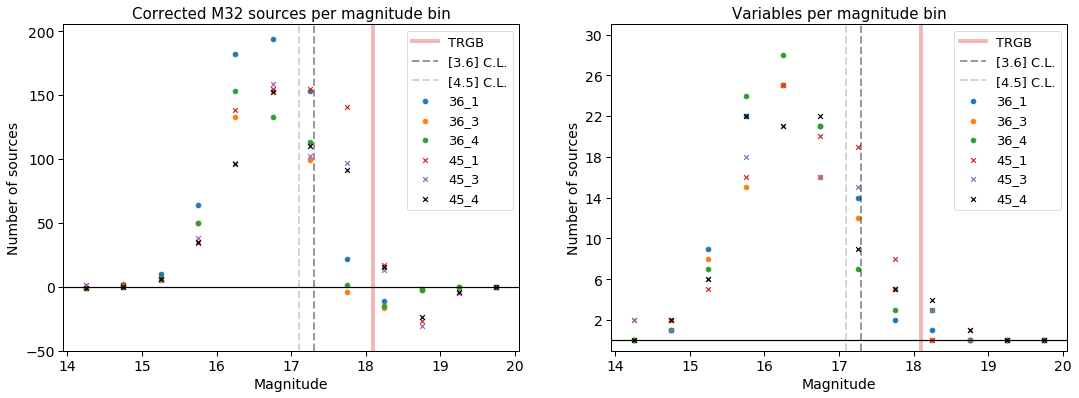

In [3]:
bins_mag=np.arange(14,20.5,0.5) #Nothing fainter than 20 so last bin is 19.5 to 20

# Find C_i_M31
bin_counts_36_0, bin_edges_36_0, binnumber_36_0 = binstat(bgd_data['mag_36_0'],values=None,statistic='count',bins=bins_mag)
#print("36_0: ",bin_counts_36_0)
bin_counts_45_0, bin_edges_45_0, binnumber_45_0 = binstat(bgd_data['mag_45_0'],values=None,statistic='count',bins=bins_mag)
#print("45_0: ",bin_counts_45_0)

# Find C_i_M32
bin_counts_36_mean, bin_edges_36_mean, binnumber_36_mean = binstat(clean_data['mean_mag_36'],values=None,statistic='count',bins=bins_mag)
print("36_mean: ",bin_counts_36_mean)
bin_counts_45_mean, bin_edges_45_mean, binnumber_45_mean = binstat(clean_data['mean_mag_45'],values=None,statistic='count',bins=bins_mag)
print("45_mean: ",bin_counts_45_mean)
# Don't need to remove bad data here as we are only counting sources in the specified region (!=-99)
bin_counts_36_1, bin_edges_36_1, binnumber_36_1 = binstat(clean_data['mag_36_1'],values=None,statistic='count',bins=bins_mag)
#print("36_1: ",bin_counts_36_1)
bin_counts_45_1, bin_edges_45_1, binnumber_45_1 = binstat(clean_data['mag_45_1'],values=None,statistic='count',bins=bins_mag)
#print("45_1: ",bin_counts_45_1)
bin_counts_36_3, bin_edges_36_3, binnumber_36_3 = binstat(clean_data['mag_36_3'],values=None,statistic='count',bins=bins_mag)
#print("36_3: ",bin_counts_36_3)
bin_counts_45_3, bin_edges_45_3, binnumber_45_3 = binstat(clean_data['mag_45_3'],values=None,statistic='count',bins=bins_mag)
#print("45_3: ",bin_counts_45_3)
bin_counts_36_4, bin_edges_36_4, binnumber_36_4 = binstat(clean_data['mag_36_4'],values=None,statistic='count',bins=bins_mag)
#print("36_4: ",bin_counts_36_4)
bin_counts_45_4, bin_edges_45_4, binnumber_45_4 = binstat(clean_data['mag_45_4'],values=None,statistic='count',bins=bins_mag)
#print("45_4: ",bin_counts_45_4)

cf_list_36_M31 = np.array([0.986878793,0.989802525,0.986566186,0.977756286,0.971537949,0.952799479,
                         0.912958115,0.833938594,0.730043061,0.608327912,0.43113577,0.276047611])
cf_list_45_M31 = np.array([0.99396608,0.992516675,0.98988764,0.981939473,0.970317793,0.929207841,
                         0.861268781,0.776867628,0.663057531,0.483034258,0.302808898,0.205102551])
cf_list_36_M32 = np.array([0.987698868,0.990127852,0.982634338,0.971949057,0.95539281,0.916341146,
                       0.849149215,0.737867283,0.612454455,0.457784285,0.297650131,0.198858075])
cf_list_45_M32 = np.array([0.993637847,0.993187579,0.986484259,0.979598498,0.957607995,0.917121588,
                       0.833498513,0.722687668,0.569235794,0.390434358,0.260214008,0.188349515])

# Introduce extra factor of scale_M31_M32~0.5 at the start due to source density ratio
# Also introduce factor called radial_CL to account for radial completeness of M32
radial_CL = 0.65
FnCn_array_36 = radial_CL*scale_M31_M32*(2/3)*bin_counts_36_0*(cf_list_36_M32/cf_list_36_M31)
FnCn_array_45 = radial_CL*scale_M31_M32*(2/3)*bin_counts_45_0*(cf_list_45_M32/cf_list_45_M31)

C_36_mean_list = np.around(bin_counts_36_mean-FnCn_array_36,decimals=0)
print("\n36_mean corrected",C_36_mean_list)
C_36_1_list = np.around(bin_counts_36_1-FnCn_array_36,decimals=0)
#print("36_1 corrected",C_36_1_list)
C_36_3_list = np.around(bin_counts_36_3-FnCn_array_36,decimals=0)
#print("36_3 corrected",C_36_3_list)
C_36_4_list = np.around(bin_counts_36_4-FnCn_array_36,decimals=0)
#print("36_4 corrected",C_36_4_list)

C_45_mean_list = np.around(bin_counts_45_mean-FnCn_array_45,decimals=0)
print("45_mean corrected",C_45_mean_list)
C_45_1_list = np.around(bin_counts_45_1-FnCn_array_45,decimals=0)
#print("45_1 corrected",C_45_1_list)
C_45_3_list = np.around(bin_counts_45_3-FnCn_array_45,decimals=0)
#print("45_3 corrected",C_45_3_list)
C_45_4_list = np.around(bin_counts_45_4-FnCn_array_45,decimals=0)
#print("45_4 corrected",C_45_4_list)




# Add together flags of variability to get how many pairs out of a possible 3 a source is variable in
clean_data['low_variable_times']=clean_data['low_variable_1_3']+clean_data['low_variable_1_4']+clean_data['low_variable_3_4']




# Find number of variables in each bin for each epoch pair
low_variable_source_idx = np.where(clean_data['low_variable_times']>0)

print("\nNumber of ALL variable sources in the catalogue:",len(low_variable_source_idx[0]))
variables_36_mean,edg,binn = binstat(clean_data['mean_mag_36'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("\n36_mean variables: ",variables_36_mean)
variables_36_1,edg,binn = binstat(clean_data['mag_36_1'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("36_1 variables: ",variables_36_1)
variables_36_3,edg,binn = binstat(clean_data['mag_36_3'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("36_3 variables: ",variables_36_3)
variables_36_4,edg,binn = binstat(clean_data['mag_36_4'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("36_4 variables: ",variables_36_4)

variables_45_mean,edg,binn = binstat(clean_data['mean_mag_45'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("45_mean variables: ",variables_45_mean)
variables_45_1,edg,binn = binstat(clean_data['mag_45_1'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("45_1 variables: ",variables_45_1)
variables_45_3,edg,binn = binstat(clean_data['mag_45_3'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("45_3 variables: ",variables_45_3)
variables_45_4,edg,binn = binstat(clean_data['mag_45_4'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("45_4 variables: ",variables_45_4)


# Plot scatter graph showing each element of the corrected list for each filter/epoch combo
rangex = bins_mag+(20-14)/(12*2)
x=rangex[0:len(rangex)-1]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=13)
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.scatter(x,C_36_1_list,label='36_1',marker='o')
plt.scatter(x,C_36_3_list,label='36_3',marker='o')
plt.scatter(x,C_36_4_list,label='36_4',marker='o')
plt.scatter(x,C_45_1_list,label='45_1',marker='x')
plt.scatter(x,C_45_3_list,label='45_3',marker='x')
plt.scatter(x,C_45_4_list,label='45_4',marker='x',color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2, label='[3.6] C.L.')
plt.axvline(x=17.1, color=sns.xkcd_rgb["grey"], linestyle='--', alpha=0.4, linewidth=2, label='[4.5] C.L.')
plt.xlabel('Magnitude')
plt.ylabel('Number of sources')
plt.yticks(np.arange(-50,225,50))
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=1.)
plt.title('Corrected M32 sources per magnitude bin',fontsize=15)

plt.subplot(1,2,2)
plt.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.scatter(x,variables_36_1,label='36_1',marker='o')
plt.scatter(x,variables_36_3,label='36_3',marker='o')
plt.scatter(x,variables_36_4,label='36_4',marker='o')
plt.scatter(x,variables_45_1,label='45_1',marker='x')
plt.scatter(x,variables_45_3,label='45_3',marker='x')
plt.scatter(x,variables_45_4,label='45_4',marker='x',color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2, label='[3.6] C.L.')
plt.axvline(x=17.1, color=sns.xkcd_rgb["grey"], linestyle='--', alpha=0.4, linewidth=2, label='[4.5] C.L.')
plt.xlabel('Magnitude')
plt.ylabel('Number of sources')
plt.yticks(np.arange(-2,34,4))
plt.ylim(-1,31)
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=1.)
plt.title('Variables per magnitude bin',fontsize=15)

[ -1.   2.   4.  68. 196. 194. 155.  50. -13.  -3.  -0.   0.]
[ 0.  2.  6. 25. 25. 22. 14.  5.  0.  0.  0.  0.]

 14.0 - 14.5
Current M32 sources: 0
Corrected M32 sources: -1
Variable M32 sources: 0
	Difference in populations!
	Number of sources to remove (all sources): 0

 14.5 - 15.0
Current M32 sources: 3
Corrected M32 sources: 2
Variable M32 sources: 2
	Keep all variables!
	Number of non-variable sources to remove: 1
Currently removed: 0
Now removed: 1
Number of variables still in this bin: 2
Number of sources now in this bin: 2

 15.0 - 15.5
Current M32 sources: 10
Corrected M32 sources: 4
Variable M32 sources: 6
	Need to get rid of some variables!
Currently saved variables: 0
Currently removed variables: 6
Now saved: 4
Number of variables still in this bin: 4
Number of sources now in this bin: 4

 15.5 - 16.0
Current M32 sources: 85
Corrected M32 sources: 68
Variable M32 sources: 25
	Keep all variables!
	Number of non-variable sources to remove: 17
Currently removed: 0
Now remove

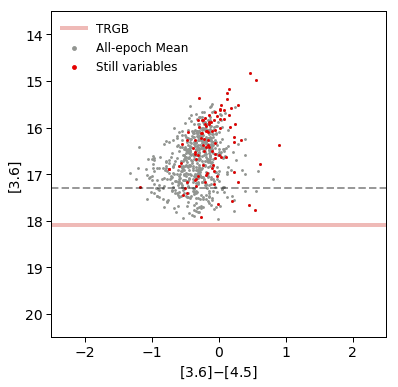

In [35]:
# Account for contamination above
print(C_36_mean_list)
print(variables_36_mean)
clean_data['remove?']=0
for i in range(len(C_36_mean_list)):
    print("\n",bin_edges_36_mean[i],"-",bin_edges_36_mean[i+1])
    print("Current M32 sources:",int(bin_counts_36_mean[i]))
    print("Corrected M32 sources:",int(C_36_mean_list[i]))
    print("Variable M32 sources:",int(variables_36_mean[i]))
    
    this_bin_all_idx = np.where((clean_data['mean_mag_36']>=bin_edges_36_mean[i])&
                                (clean_data['mean_mag_36']<bin_edges_36_mean[i+1]))
    #print(len(this_bin_all_idx[0]))
    
    if C_36_mean_list[i]<0:
        print("\tDifference in populations!")
        # Should get rid of all sources in this bin
        print("\tNumber of sources to remove (all sources):",len(this_bin_all_idx[0]))
        clean_data['remove?'][this_bin_all_idx]=1
        
    elif C_36_mean_list[i]>=variables_36_mean[i]:
        if variables_36_mean[i]>0:
            print("\tKeep all variables!")
            remove_some = int(bin_counts_36_mean[i])-int(C_36_mean_list[i])
            print("\tNumber of non-variable sources to remove:",remove_some)
            currently_removed_idx = np.where(clean_data['remove?'][this_bin_all_idx]==1)
            print("Currently removed:",len(currently_removed_idx[0]))
            while len(currently_removed_idx[0]) < remove_some:
                value = randint(0, len(this_bin_all_idx[0])-1)
                catalogue_row = this_bin_all_idx[0][value]
                #print(catalogue_row)
                # If source isn't already up to be removed and isn't a variable
                if ((clean_data['remove?'][catalogue_row]==0) & (clean_data['low_variable_times'][catalogue_row]==0)):
                    clean_data['remove?'][catalogue_row]=1
                    #print(clean_data['remove?'][catalogue_row])
                    #print("DONE")
                    now_removed_idx = np.where(clean_data['remove?'][this_bin_all_idx]==1)
                    #print("Now removed:",len(now_removed_idx[0]))
                if len(now_removed_idx[0]) == remove_some:
                    print("Now removed:",len(now_removed_idx[0]))
                    break
                    
            still_variable_idx=np.where((clean_data['low_variable_times'][this_bin_all_idx]>0)&
                                        (clean_data['remove?'][this_bin_all_idx]==0))
            print("Number of variables still in this bin:",len(still_variable_idx[0]))
            still_in_bin_idx=np.where(clean_data['remove?'][this_bin_all_idx]==0)
            print("Number of sources now in this bin:",len(still_in_bin_idx[0]))
            
        else:
            print("\tNo variables to remove here.")
            
    else:
        print("\tNeed to get rid of some variables!")
        # Pretend you'll remove everything and then recover the right amount of variables (random)
        clean_data['remove?'][this_bin_all_idx]=1
        variables_here_idx = np.where((clean_data['low_variable_times']>0)&
                                      (clean_data['mean_mag_36']>=bin_edges_36_mean[i])&
                                      (clean_data['mean_mag_36']<bin_edges_36_mean[i+1]))
        #print(variables_here_idx)
        #print(len(variables_here_idx[0]))
        currently_saved_idx = np.where(clean_data['remove?'][this_bin_all_idx]==0)
        currently_removed_idx = np.where((clean_data['remove?'][this_bin_all_idx]==1)&(clean_data['low_variable_times'][this_bin_all_idx]>0))
        print("Currently saved variables:",len(currently_saved_idx[0]))
        print("Currently removed variables:",len(currently_removed_idx[0]))
        while len(currently_saved_idx[0]) < C_36_mean_list[i]:
            value = randint(0, len(variables_here_idx[0])-1)
            catalogue_row = variables_here_idx[0][value]
            #print(value)
            #print(catalogue_row)
            # If source isn't already up to be saved
            #print(clean_data['remove?'][catalogue_row])
            if (clean_data['remove?'][catalogue_row]==1):
                clean_data['remove?'][catalogue_row]=0
                now_saved_idx = np.where(clean_data['remove?'][this_bin_all_idx]==0)
                #print("Now saved:",len(now_saved_idx[0]))
            if len(now_saved_idx[0]) == C_36_mean_list[i]:
                print("Now saved:",len(now_saved_idx[0]))
                break
                    
        still_variable_idx=np.where((clean_data['low_variable_times'][this_bin_all_idx]>0)&
                                    (clean_data['remove?'][this_bin_all_idx]==0))
        print("Number of variables still in this bin:",len(still_variable_idx[0]))
        still_in_bin_idx=np.where(clean_data['remove?'][this_bin_all_idx]==0)
        print("Number of sources now in this bin:",len(still_in_bin_idx[0]))
    
    
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,6))

keep_idx = np.where(clean_data['remove?']==0)
still_variable_idx = np.where((clean_data['low_variable_times']>0)&(clean_data['remove?']==0))
plt.scatter(clean_data['mean_mag_36'][keep_idx]-clean_data['mean_mag_45'][keep_idx], clean_data['mean_mag_36'][keep_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
plt.scatter(clean_data['mean_mag_36'][still_variable_idx]-clean_data['mean_mag_45'][still_variable_idx], clean_data['mean_mag_36'][still_variable_idx], s=3.9,color=sns.xkcd_rgb['red'], label="Still variables")
plt.ylabel("[3.6]", fontsize=14)
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

corr_36_cat = clean_data[keep_idx]


Number of ALL variable sources in the catalogue: 97
45_mean:  [  2.   0.   8.  36. 128. 177. 143. 123.  50.   2.   0.   0.]
45_mean variables:  [ 2.  0.  7. 16. 23. 23. 16.  8.  2.  0.  0.  0.]
45_mean corrected [  1.   0.  10.  34. 128. 179. 141. 157.  47. -34.  -5.   0.]

 14.0 - 14.5
Current M32 sources: 2
Corrected M32 sources: 1
Variable M32 sources: 2
	Need to get rid of some variables!
Currently saved variables: 0
Currently removed variables: 2
Now saved: 1
Number of variables still in this bin: 1
Number of sources now in this bin: 1

 14.5 - 15.0
Current M32 sources: 0
Corrected M32 sources: 0
Variable M32 sources: 0
	No variables to remove here.

 15.0 - 15.5
Current M32 sources: 8
Corrected M32 sources: 10
Variable M32 sources: 7
	Keep all variables!
	Number of non-variable sources to remove: -2
Currently removed: 0
Number of variables still in this bin: 7
Number of sources now in this bin: 8

 15.5 - 16.0
Current M32 sources: 36
Corrected M32 sources: 34
Variable M32 source

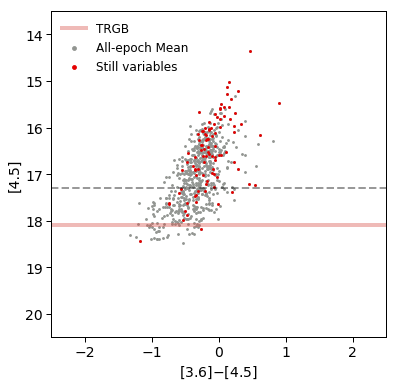

In [36]:
# Now look at 4.5 stats using this corr_36_cat

bins_mag=np.arange(14,20.5,0.5) #Nothing fainter than 20 so last bin is 19.5 to 20

# Find number of variables in each bin for each epoch pair
low_variable_source_idx = np.where(corr_36_cat['low_variable_times']>0)
print("\nNumber of ALL variable sources in the catalogue:",len(low_variable_source_idx[0]))

# Find C_i_M32 from corr_36_cat
# Note that C_45_mean_list does not need to be reconsidered as it is constant and the ultimate goal of reduction
bin_counts_45_mean, bin_edges_45_mean, binnumber_45_mean = binstat(corr_36_cat['mean_mag_45'],values=None,statistic='count',bins=bins_mag)
print("45_mean: ",bin_counts_45_mean)

variables_45_mean,edg,binn = binstat(corr_36_cat['mean_mag_45'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("45_mean variables: ",variables_45_mean)

print("45_mean corrected [  1.   0.  10.  34. 128. 179. 141. 157.  47. -34.  -5.   0.]")

# Account for contamination above
for i in range(len(C_45_mean_list)):
    print("\n",bin_edges_45_mean[i],"-",bin_edges_45_mean[i+1])
    print("Current M32 sources:",int(bin_counts_45_mean[i]))
    print("Corrected M32 sources:",int(C_45_mean_list[i]))
    print("Variable M32 sources:",int(variables_45_mean[i]))
    
    this_bin_all_idx = np.where((corr_36_cat['mean_mag_45']>=bin_edges_45_mean[i])&
                                (corr_36_cat['mean_mag_45']<bin_edges_45_mean[i+1]))
    #print(len(this_bin_all_idx[0]))
    
    if C_45_mean_list[i]<0:
        print("\tDifference in populations!")
        # Should get rid of all sources in this bin
        print("\tNumber of sources to remove (all sources):",len(this_bin_all_idx[0]))
        corr_36_cat['remove?'][this_bin_all_idx]=1
        
    elif C_45_mean_list[i]>=variables_45_mean[i]:
        if variables_45_mean[i]>0:
            print("\tKeep all variables!")
            remove_some = int(bin_counts_45_mean[i])-int(C_45_mean_list[i])
            print("\tNumber of non-variable sources to remove:",remove_some)
            currently_removed_idx = np.where(corr_36_cat['remove?'][this_bin_all_idx]==1)
            print("Currently removed:",len(currently_removed_idx[0]))
            while len(currently_removed_idx[0]) < remove_some:
                value = randint(0, len(this_bin_all_idx[0])-1)
                catalogue_row = this_bin_all_idx[0][value]
                #print(catalogue_row)
                # If source isn't already up to be removed and isn't a variable
                if ((corr_36_cat['remove?'][catalogue_row]==0) & (corr_36_cat['low_variable_times'][catalogue_row]==0)):
                    corr_36_cat['remove?'][catalogue_row]=1
                    #print(corr_36_cat['remove?'][catalogue_row])
                    #print("DONE")
                    now_removed_idx = np.where(corr_36_cat['remove?'][this_bin_all_idx]==1)
                    #print("Now removed:",len(now_removed_idx[0]))
                if len(now_removed_idx[0]) == remove_some:
                    print("Now removed:",len(now_removed_idx[0]))
                    break
                    
            still_variable_idx=np.where((corr_36_cat['low_variable_times'][this_bin_all_idx]>0)&
                                        (corr_36_cat['remove?'][this_bin_all_idx]==0))
            print("Number of variables still in this bin:",len(still_variable_idx[0]))
            still_in_bin_idx=np.where(corr_36_cat['remove?'][this_bin_all_idx]==0)
            print("Number of sources now in this bin:",len(still_in_bin_idx[0]))
            
        else:
            print("\tNo variables to remove here.")
            
    else:
        print("\tNeed to get rid of some variables!")
        # Pretend you'll remove everything and then recover the right amount of variables (random)
        corr_36_cat['remove?'][this_bin_all_idx]=1
        variables_here_idx = np.where((corr_36_cat['low_variable_times']>0)&
                                      (corr_36_cat['mean_mag_45']>=bin_edges_45_mean[i])&
                                      (corr_36_cat['mean_mag_45']<bin_edges_45_mean[i+1]))
        #print(variables_here_idx)
        #print(len(variables_here_idx[0]))
        currently_saved_idx = np.where(corr_36_cat['remove?'][this_bin_all_idx]==0)
        currently_removed_idx = np.where((corr_36_cat['remove?'][this_bin_all_idx]==1)&(corr_36_cat['low_variable_times'][this_bin_all_idx]>0))
        print("Currently saved variables:",len(currently_saved_idx[0]))
        print("Currently removed variables:",len(currently_removed_idx[0]))
        while len(currently_saved_idx[0]) < C_45_mean_list[i]:
            value = randint(0, len(variables_here_idx[0])-1)
            catalogue_row = variables_here_idx[0][value]
            #print(value)
            #print(catalogue_row)
            # If source isn't already up to be saved
            #print(corr_36_cat['remove?'][catalogue_row])
            if (corr_36_cat['remove?'][catalogue_row]==1):
                corr_36_cat['remove?'][catalogue_row]=0
                now_saved_idx = np.where(corr_36_cat['remove?'][this_bin_all_idx]==0)
                #print("Now saved:",len(now_saved_idx[0]))
            if len(now_saved_idx[0]) == C_45_mean_list[i]:
                print("Now saved:",len(now_saved_idx[0]))
                break
                    
        still_variable_idx=np.where((corr_36_cat['low_variable_times'][this_bin_all_idx]>0)&
                                    (corr_36_cat['remove?'][this_bin_all_idx]==0))
        print("Number of variables still in this bin:",len(still_variable_idx[0]))
        still_in_bin_idx=np.where(corr_36_cat['remove?'][this_bin_all_idx]==0)
        print("Number of sources now in this bin:",len(still_in_bin_idx[0]))
    
    
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,6))

keep_idx = np.where(corr_36_cat['remove?']==0)
still_variable_idx = np.where((corr_36_cat['low_variable_times']>0)&(corr_36_cat['remove?']==0))
plt.scatter(corr_36_cat['mean_mag_36'][keep_idx]-corr_36_cat['mean_mag_45'][keep_idx], corr_36_cat['mean_mag_45'][keep_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
plt.scatter(corr_36_cat['mean_mag_36'][still_variable_idx]-corr_36_cat['mean_mag_45'][still_variable_idx], corr_36_cat['mean_mag_45'][still_variable_idx], s=3.9,color=sns.xkcd_rgb['red'], label="Still variables")
plt.ylabel("[4.5]", fontsize=14)
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

final_M32_cat = corr_36_cat[keep_idx]
low_variable_source_idx = np.where(final_M32_cat['low_variable_times']>0)
print("\nNumber of ALL variable sources in the catalogue:",len(low_variable_source_idx[0]))

# Graphs for contamination-corrected catalogue

In [37]:
# Now we have a (random) final catalogue!
print("Sources left in M32 catalogue:",len(final_M32_cat))

Sources left in M32 catalogue: 659


Number of variables identified: 96
Number of variables as % of final catalogue:  14.56752655538695


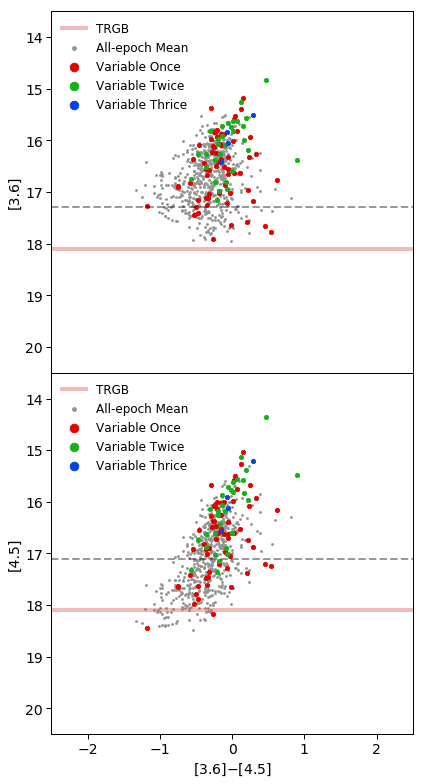

In [38]:
# Find variable sources!
# Class a source as variable if it shows variability in at least one epoch pair
# Variable source index defined above in variable section (histogram)
low_variable_source_idx = np.where(final_M32_cat['low_variable_times']>0)
variable_data = final_M32_cat[low_variable_source_idx]
print("Number of variables identified:",len(variable_data))
print("Number of variables as % of final catalogue: ",100*len(variable_data)/len(final_M32_cat))


once_idx = np.where(variable_data['low_variable_times']==1)
twice_idx = np.where(variable_data['low_variable_times']==2)
thrice_idx = np.where(variable_data['low_variable_times']==3)

# Mean CMDs with variables overplotted according to above histogram
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][once_idx]-variable_data['mean_mag_45'][once_idx], variable_data['mean_mag_36'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['mean_mag_36'][twice_idx]-variable_data['mean_mag_45'][twice_idx], variable_data['mean_mag_36'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.scatter(variable_data['mean_mag_36'][thrice_idx]-variable_data['mean_mag_45'][thrice_idx], variable_data['mean_mag_36'][thrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Variable Thrice")
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][once_idx]-variable_data['mean_mag_45'][once_idx], variable_data['mean_mag_45'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['mean_mag_36'][twice_idx]-variable_data['mean_mag_45'][twice_idx], variable_data['mean_mag_45'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.scatter(variable_data['mean_mag_36'][thrice_idx]-variable_data['mean_mag_45'][thrice_idx], variable_data['mean_mag_45'][thrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Variable Thrice")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

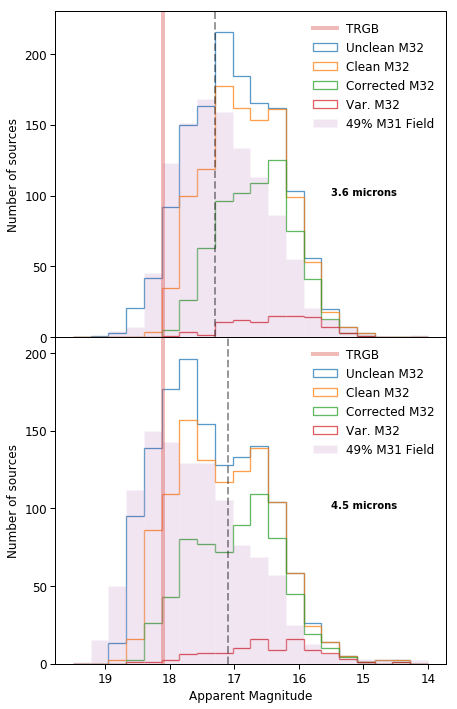

In [154]:
def set_pub():
    """
    Set up some great plot perameters
    """
    plt.rc('font', family='sans-serif')
    #plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=12)
    plt.rc("ytick", labelsize=12)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=10)
    plt.rc('savefig', dpi=400)           # Higher res outputs for journals
    # plt.rcdefaults()                   # Resets the parameters to their default values


set_pub()


# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
#fig = plt.figure(figsize=(8, 8))
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(7, 12))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36'])  # Determinal optimal bin size
#bins = np.linspace(12, 20, 31)  # Bin start, end, number +1
bins = np.linspace(14, 19.5, 21)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(unclean_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")
n, edg, patches = ax1.hist(clean_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Clean M32", ls="solid")
n, edg, patches = ax1.hist(final_M32_cat['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Corrected M32", ls="solid")
n, edg, patches = ax1.hist(variable_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=0.0, histtype='step', label=None, ls="solid")
rangex = bins+(19.5-14)/(20*2)
ax1.bar(x=rangex[0:len(rangex)-1],height=scale_M31_M32*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(19.5-14)/20,alpha=0.1,label='49% M31 Field')




#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number of sources", fontsize=12)
ax1.set_ylim(0,230)
ax1.set_yticks(np.arange(0,250,50))


#Add 80% Completness limit
ax1.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax1.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax1.annotate("3.6 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')



n, edg, patches = ax2.hist(unclean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")
n, edg, patches = ax2.hist(clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Clean M32", ls="solid")
n, edg, patches = ax2.hist(final_M32_cat['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Corrected M32", ls="solid")
n, edg, patches = ax2.hist(variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax2.hist(bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=0.0, histtype='step', ls="solid",label=None)
ax2.bar(x=rangex[0:len(rangex)-1],height=scale_M31_M32*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(19.5-14)/20,alpha=0.1,label='49% M31 Field')


ax2.set_xlabel("Apparent Magnitude", fontsize=12)
ax2.set_ylabel("Number of sources", fontsize=12)
ax2.set_ylim(0,210)
ax2.set_yticks(np.arange(0,250,50))

#Add 80% Completness limit
ax2.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax2.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax2.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax2.annotate("4.5 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')


plt.gca().invert_xaxis()    # flip the x-axis

plt.savefig("fixing/contam_correct_opt/LumFn.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


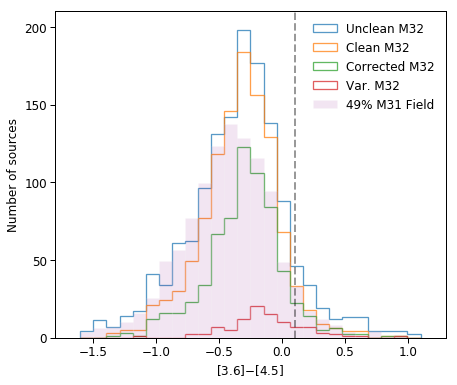

In [155]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
fig = plt.figure(figsize=(7, 6))
ax1 = plt.gca()  # Sets up active plot region

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36']-clean_data['mean_mag_45'])  # Determinal optimal bin size
bins = np.linspace(-1.6, 1.1, 27)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(unclean_data['mean_mag_36']-unclean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")
n, edg, patches = ax1.hist(clean_data['mean_mag_36']-clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Clean M32", ls="solid")
n, edg, patches = ax1.hist(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Corrected M32", ls="solid")
n, edg, patches = ax1.hist(variable_data['mean_mag_36']-variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0']-bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=0.0, histtype='step', label=None, ls="solid")
rangex = bins+(1.1+1.6)/(26*2)
plt.bar(x=rangex[0:len(rangex)-1],height=scale_M31_M32*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(1.1+1.6)/26,alpha=0.1,label='49% M31 Field')



ax1.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax1.set_ylabel("Number of sources", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Set legend
ax1.legend(loc='upper right', frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.tight_layout()
ax1.set_xlim(-1.8,1.3)
ax1.set_ylim(0,210)
ax1.set_yticks(np.arange(0,210,50))
plt.savefig("fixing/contam_correct_opt/ColFn.pdf", bbox_inches='tight')

plt.show()
plt.close()


# Classify Sources

C:\Users\Mikey\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


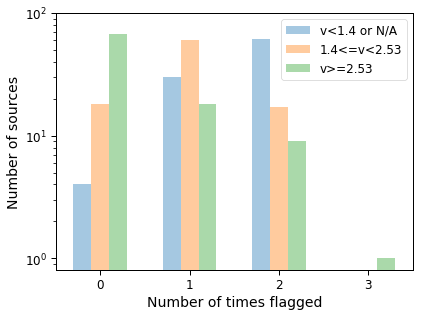

In [41]:
# Add together flags of variability to get how many pairs out of a possible 3 a source is variable in

# Note that low variable definition is v>=1.4 and high definition is v>2.53
# Therefore there is an overlap between the two categories and they are not mutually exclusive!
# To simplify things we will separate these two
low_and_high_13_idx = np.where((variable_data['low_variable_1_3']==1)&(variable_data['high_variable_1_3']==1))
variable_data['low_variable_1_3'][low_and_high_13_idx]=0
low_and_high_14_idx = np.where((variable_data['low_variable_1_4']==1)&(variable_data['high_variable_1_4']==1))
variable_data['low_variable_1_4'][low_and_high_14_idx]=0
low_and_high_34_idx = np.where((variable_data['low_variable_3_4']==1)&(variable_data['high_variable_3_4']==1))
variable_data['low_variable_3_4'][low_and_high_34_idx]=0
# Need to also recalculate the total number of low_variable times
variable_data['low_variable_times']=variable_data['low_variable_1_3']+variable_data['low_variable_1_4']+variable_data['low_variable_3_4']
# Now find the analogue for high variables
variable_data['high_variable_times']=variable_data['high_variable_1_3']+variable_data['high_variable_1_4']+variable_data['high_variable_3_4']

variable_data['NA_variable_times']=3-variable_data['high_variable_times']-variable_data['low_variable_times']

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(6)
ax = sns.distplot(variable_data['NA_variable_times'] ,kde=False, bins=bins-0.7,
                 hist_kws={"rwidth":0.2},label='v<1.4 or N/A')
ax = sns.distplot(variable_data['low_variable_times'] ,kde=False, bins=bins-0.5,
                 hist_kws={"rwidth":0.2},label='1.4<=v<2.53')
ax = sns.distplot(variable_data['high_variable_times'] ,kde=False, bins=bins-0.3,
                 hist_kws={"rwidth":0.2},label='v>=2.53')

#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
ax.set_yscale('log')
ax.set_ylim(0,100)
ax.set_xlabel('Number of times flagged')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([0,1,2,3])
ax.set_xlim(-0.5,3.5)
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=2.)


Total number of variables: 96
Number of low-confidence variables: 84
Number of high-confidence variables: 12


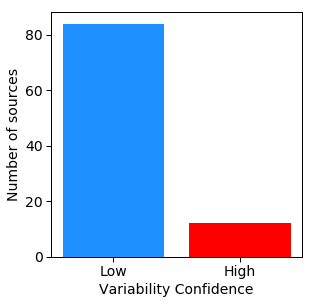

In [42]:
# Create an index for each outcome and write flag to column
variable_data['High_Confidence']=0
variable_data['Low_Confidence']=0

# High Confidence Variables
high3_idx=np.where(variable_data['high_variable_times']==3)
variable_data['High_Confidence'][high3_idx]=1

high2_low1_idx=np.where((variable_data['high_variable_times']==2)&(variable_data['low_variable_times']==1))
variable_data['High_Confidence'][high2_low1_idx]=1

high1_low2_idx=np.where((variable_data['high_variable_times']==1)&(variable_data['low_variable_times']==2))
variable_data['High_Confidence'][high1_low2_idx]=1

high2_NA1_idx=np.where((variable_data['high_variable_times']==2)&(variable_data['NA_variable_times']==1))
variable_data['High_Confidence'][high2_NA1_idx]=1

# Low Confidence Variables
low3_idx=np.where((variable_data['low_variable_times']==3))
variable_data['Low_Confidence'][low3_idx]=1

high1_low1_NA1_idx=np.where((variable_data['high_variable_times']==1)&(variable_data['low_variable_times']==1)&
                            (variable_data['NA_variable_times']==1))
variable_data['Low_Confidence'][high1_low1_NA1_idx]=1

high1_NA2_idx=np.where((variable_data['high_variable_times']==1)&(variable_data['NA_variable_times']==2))
variable_data['Low_Confidence'][high1_NA2_idx]=1

low2_NA1_idx=np.where((variable_data['low_variable_times']==2)&(variable_data['NA_variable_times']==1))
variable_data['Low_Confidence'][low2_NA1_idx]=1

low1_NA2_idx=np.where((variable_data['low_variable_times']==1)&(variable_data['NA_variable_times']==2))
variable_data['Low_Confidence'][low1_NA2_idx]=1


# Plot histogram of high and low sources
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
ig = plt.figure(figsize=(4.5,4.5))

bars = ('Low', 'High')
# Choose the position of each barplot on the x-axis
y_pos = [1,2]

low_idx = np.where(variable_data['Low_Confidence']==1)
high_idx = np.where(variable_data['High_Confidence']==1)
number_spread = np.array([len(low_idx[0]),len(high_idx[0])])
# Create bars
plt.bar(y_pos, number_spread,color=['dodgerblue','red'])
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel("Variability Confidence")
plt.ylabel("Number of sources")
#plt.yticks(np.arange(0,95,10))

print("Total number of variables:",number_spread[0]+number_spread[1])
print("Number of low-confidence variables:",number_spread[0])
print("Number of high-confidence variables:",number_spread[1])

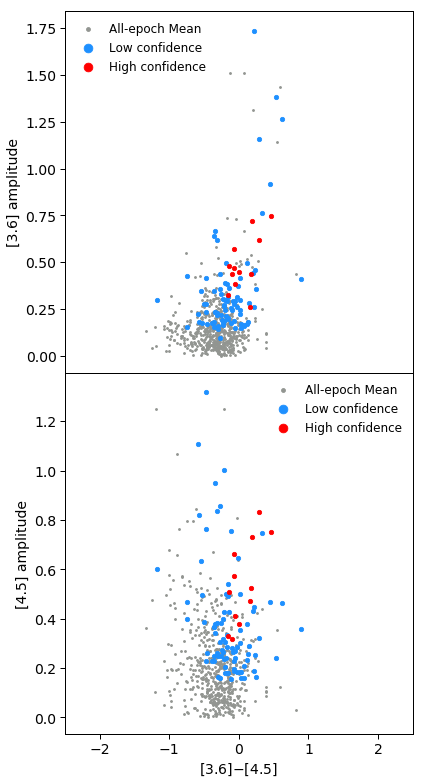

In [43]:
# Plot colour against amplitude for the final data set.
# We want to overplot the different classifications of variables on this

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['amp_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][low_idx]-variable_data['mean_mag_45'][low_idx], variable_data['amp_36'][low_idx],s=19,color='dodgerblue',label="Low confidence")
plt.scatter(variable_data['mean_mag_36'][high_idx]-variable_data['mean_mag_45'][high_idx], variable_data['amp_36'][high_idx],s=19,color='red',label="High confidence")
plt.ylabel("[3.6] amplitude", fontsize=14)
plt.xlim(-2.5,2.5)
#plt.ylim(20.5,13.5)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['amp_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][low_idx]-variable_data['mean_mag_45'][low_idx], variable_data['amp_45'][low_idx],s=19,color='dodgerblue',label="Low confidence")
plt.scatter(variable_data['mean_mag_36'][high_idx]-variable_data['mean_mag_45'][high_idx], variable_data['amp_45'][high_idx],s=19,color='red',label="High confidence")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5] amplitude", fontsize=14)
plt.xlim(-2.5,2.5)
#plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

C:\Users\Mikey\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\Mikey\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


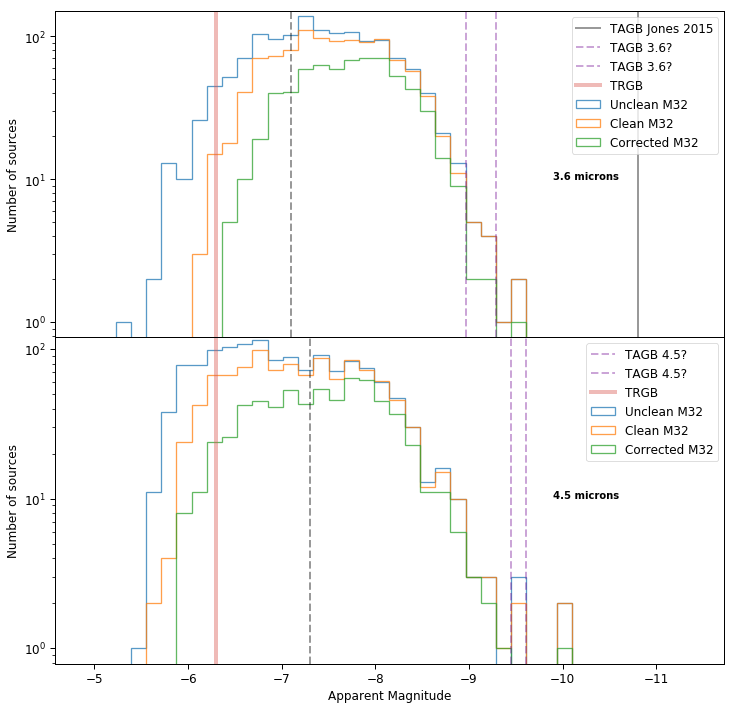

-10.035114429999998
[-11.4    -11.2375 -11.075  -10.9125 -10.75   -10.5875 -10.425  -10.2625
 -10.1     -9.9375  -9.775   -9.6125  -9.45    -9.2875  -9.125   -8.9625
  -8.8     -8.6375  -8.475   -8.3125  -8.15    -7.9875  -7.825   -7.6625
  -7.5     -7.3375  -7.175   -7.0125  -6.85    -6.6875  -6.525   -6.3625
  -6.2     -6.0375  -5.875   -5.7125  -5.55    -5.3875  -5.225   -5.0625
  -4.9   ]
-9.2875 means 15.112499999999999
-9.45 means 14.95


In [190]:
# Estimate tip of AGB

def set_pub():
    """
    Set up some great plot perameters
    """
    plt.rc('font', family='sans-serif')
    #plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=12)
    plt.rc("ytick", labelsize=12)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=10)
    plt.rc('savefig', dpi=400)           # Higher res outputs for journals
    # plt.rcdefaults()                   # Resets the parameters to their default values


set_pub()


# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
#fig = plt.figure(figsize=(8, 8))
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(12, 12))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36'])  # Determinal optimal bin size
#bins = np.linspace(12, 20, 31)  # Bin start, end, number +1
bins = np.linspace(13-24.4, 19.5-24.4, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(unclean_data['mean_mag_36']-24.4, bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")
n, edg, patches = ax1.hist(clean_data['mean_mag_36']-24.4, bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Clean M32", ls="solid")
n, edg, patches = ax1.hist(final_M32_cat['mean_mag_36']-24.4, bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Corrected M32", ls="solid")


#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number of sources", fontsize=12)
#ax1.set_ylim(0,230)
#ax1.set_yticks(np.arange(0,250,50))


#Add 80% Completness limit
ax1.axvline(x=17.3-24.4, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
ax1.axvline(x=-10.8, color=sns.xkcd_rgb["black"], linestyle='-', alpha=0.4, linewidth=2,label='TAGB Jones 2015')
ax1.axvline(x=-9.2875, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB 3.6?')
ax1.axvline(x=-8.9625, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB 3.6?')



#Add TRGB
ax1.axvline(x=-6.3+24.4-24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax1.legend(loc='upper right', frameon=True, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax1.annotate("3.6 microns", [14.5-24.4, 10], horizontalalignment='left', size='medium', color='black',weight='bold')
ax1.set_yscale('log')
ax1.set_ylim(0,150)


n, edg, patches = ax2.hist(unclean_data['mean_mag_45']-24.4, bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")
n, edg, patches = ax2.hist(clean_data['mean_mag_45']-24.4, bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Clean M32", ls="solid")
n, edg, patches = ax2.hist(final_M32_cat['mean_mag_45']-24.4, bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Corrected M32", ls="solid")

ax2.set_xlabel("Apparent Magnitude", fontsize=12)
ax2.set_ylabel("Number of sources", fontsize=12)

#ax2.set_yticks(np.arange(0,250,50))

#Add 80% Completness limit
ax2.axvline(x=17.1-24.4, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
ax2.axvline(x=-9.6125, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB 4.5?')
ax2.axvline(x=-9.45, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB 4.5?')



#Add TRGB
ax2.axvline(x=-6.3+24.4-24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax2.legend(loc='upper right', frameon=True, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax2.annotate("4.5 microns", [14.5-24.4, 10], horizontalalignment='left', size='medium', color='black',weight='bold')
ax2.set_yscale('log')
ax2.set_ylim(0,120)

plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("fixing/contam_correct_opt/LumFn.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()

print(min(unclean_data['mean_mag_45'])-24.4)
print(edg)
print("-9.2875 means",-9.2875+24.4)
print("-9.45 means",-9.45+24.4)

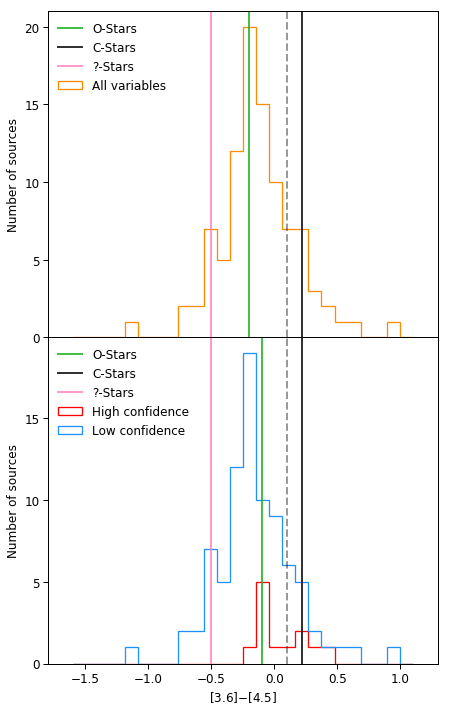

In [156]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(7, 12))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bins = np.linspace(-1.6, 1.1, 27)  # Bin start, end, number +1
############################################################################################################

n, edg, patches = ax1.hist(variable_data['mean_mag_36']-variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1., histtype='step', label="All variables", ls="solid",edgecolor='darkorange')
#n, edg, patches = ax1.hist(variable_data['mean_mag_36'][high_idx]-variable_data['mean_mag_45'][high_idx], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1., histtype='step', label="High confidence", ls="solid")
#n, edg, patches = ax1.hist(variable_data['mean_mag_36'][low_idx]-variable_data['mean_mag_45'][low_idx], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1., histtype='step', label="Low confidence", ls="solid")



ax1.set_ylabel("Number of sources", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

ax1.axvline(x=-0.2, color=sns.xkcd_rgb["green"], linestyle='-', alpha=0.8, linewidth=2,label='O-Stars')
ax1.axvline(x=0.22, color=sns.xkcd_rgb["black"], linestyle='-', alpha=0.8, linewidth=2,label='C-Stars')
ax1.axvline(x=-0.5, color=sns.xkcd_rgb["pink"], linestyle='-', alpha=0.8, linewidth=2,label='?-Stars')

#Set legend
ax1.legend(loc='upper left', frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
ax1.set_xlim(-1.4,1.3)
#ax1.set_ylim(0,210)
ax1.set_yticks(np.arange(0,21,5))



#n, edg, patches = ax1.hist(variable_data['mean_mag_36']-variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1., histtype='step', label="All variables", ls="solid",edgecolor='red')
n, edg, patches = ax2.hist(variable_data['mean_mag_36'][high_idx]-variable_data['mean_mag_45'][high_idx], bins, edgecolor='red',
                          lw=1.3, alpha=1., histtype='step', label="High confidence", ls="solid")
n, edg, patches = ax2.hist(variable_data['mean_mag_36'][low_idx]-variable_data['mean_mag_45'][low_idx], bins, edgecolor='dodgerblue',
                          lw=1.3, alpha=1., histtype='step', label="Low confidence", ls="solid")



ax2.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax2.set_ylabel("Number of sources", fontsize=12)

#Add 80% Completness limit
ax2.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

ax2.axvline(x=-0.1, color=sns.xkcd_rgb["green"], linestyle='-', alpha=0.8, linewidth=2,label='O-Stars')
ax2.axvline(x=0.22, color=sns.xkcd_rgb["black"], linestyle='-', alpha=0.8, linewidth=2,label='C-Stars')
ax2.axvline(x=-0.5, color=sns.xkcd_rgb["pink"], linestyle='-', alpha=0.8, linewidth=2,label='?-Stars')

#Set legend
ax2.legend(loc='upper left', frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.tight_layout()
ax2.set_xlim(-1.8,1.3)
#ax2.set_ylim(0,210)
ax2.set_yticks(np.arange(0,19,5))
plt.savefig("fixing/contam_correct_opt/VarColFn.pdf", bbox_inches='tight')

plt.show()
plt.close()


In [63]:
# Set a splitting value for the colour to classify O and C stars for high confidence variables
#print(edg)
# cutoff value is 0.062
COCO = 0.062

variable_data['C_star']=0
variable_data['O_star']=0

C_var_idx = np.where((variable_data['High_Confidence']==1)&
                    (variable_data['mean_mag_36']-variable_data['mean_mag_45']>=COCO))
variable_data['C_star'][C_var_idx]=1

O_var_idx = np.where((variable_data['High_Confidence']==1)&
                    (variable_data['mean_mag_36']-variable_data['mean_mag_45']<COCO))
variable_data['O_star'][O_var_idx]=1

print("Number of C stars:",len(C_var_idx[0]))
print("Number of O stars:",len(O_var_idx[0]))
print("But if TAGB is right then we will have one less C star (see below) - probably an RSG")

Number of C stars: 5
Number of O stars: 7


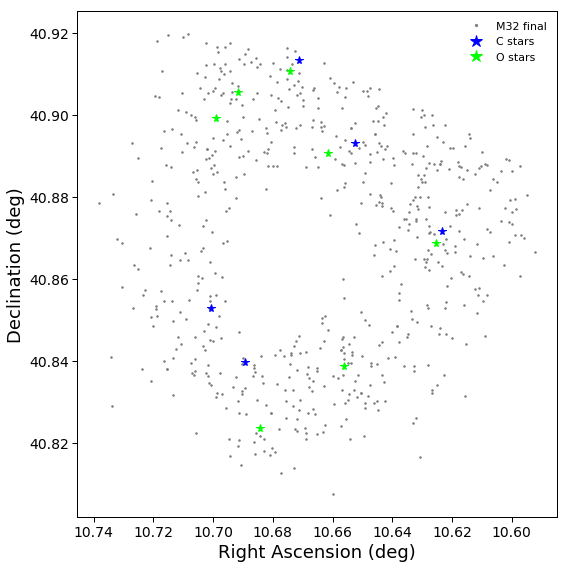

In [197]:
# Location plot of variables split by the histogram above

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.plot(final_M32_cat['RA'], final_M32_cat['Dec'], '.', color='grey', ms=3, label="M32 final")
plt.plot(variable_data['RA'][C_var_idx], variable_data['Dec'][C_var_idx], '*', color='blue', ms=8, label="C stars")
plt.plot(variable_data['RA'][O_var_idx], variable_data['Dec'][O_var_idx], '*', color='lime', ms=8, label="O stars")  

plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=1.5)
#plt.title('M32 epoch 1',fontsize=18)
plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

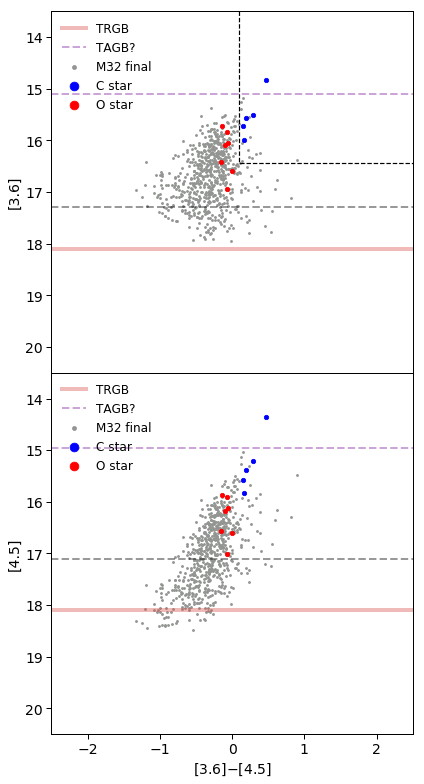

In [204]:
# Mean CMD with classified variables overplotted according to above

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 final")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][C_var_idx]-variable_data['mean_mag_45'][C_var_idx], variable_data['mean_mag_36'][C_var_idx],s=19,color='blue',label="C star")
plt.scatter(variable_data['mean_mag_36'][O_var_idx]-variable_data['mean_mag_45'][O_var_idx], variable_data['mean_mag_36'][O_var_idx],s=19,color='red',label="O star")
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)

xlim = [-2.5,2.5]
ylim = [20.5,13.5]
plt.plot([x,x,xlim[1]],[ylim[1],y,y],linestyle='dashed',color='black')

#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.axhline(y=15.11, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB?')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 final")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][C_var_idx]-variable_data['mean_mag_45'][C_var_idx], variable_data['mean_mag_45'][C_var_idx],s=19,color='blue',label="C star")
plt.scatter(variable_data['mean_mag_36'][O_var_idx]-variable_data['mean_mag_45'][O_var_idx], variable_data['mean_mag_45'][O_var_idx],s=19,color='red',label="O star")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.axhline(y=14.95, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB?')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

1


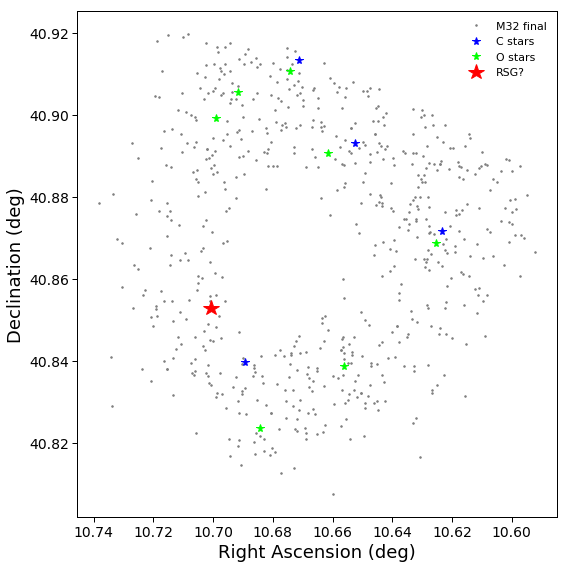

In [203]:
# If TAGB is correct, which C star is the RSG??

variable_data['RSG']=0
RSG_idx = np.where((variable_data['mean_mag_36']<15.11)&(variable_data['mean_mag_36']<14.95))
print(len(RSG_idx[0]))

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.plot(final_M32_cat['RA'], final_M32_cat['Dec'], '.', color='grey', ms=3, label="M32 final")
plt.plot(variable_data['RA'][C_var_idx], variable_data['Dec'][C_var_idx], '*', color='blue', ms=8, label="C stars")
plt.plot(variable_data['RA'][O_var_idx], variable_data['Dec'][O_var_idx], '*', color='lime', ms=8, label="O stars")  
plt.plot(variable_data['RA'][RSG_idx], variable_data['Dec'][RSG_idx], '*', color='red', ms=16, label="RSG?")  

plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=1.)
#plt.title('M32 epoch 1',fontsize=18)
plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

# Dust estimates!

In [45]:
# Estimate dust budget for variable stars

# First use all variables
print("For all variables:")
mean_colour_array = variable_data['mean_mag_36']-variable_data['mean_mag_45']
mean_colour_variables = np.mean(mean_colour_array)
std_colour_variables = np.std(mean_colour_array)
D=np.power(10,-9.5+(1.4*mean_colour_variables))
D1=np.format_float_scientific(D,2)
print("Dust production rate: ",D1,"M_sol/yr")
print("Mass loss rate: ",np.format_float_scientific(200*D,2),"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables-std_colour_variables))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables+std_colour_variables))),2)
#print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

# Then try high-confidence
print("\nFor high-confidence variables:")
mean_colour_array = variable_data['mean_mag_36'][high_idx]-variable_data['mean_mag_45'][high_idx]
mean_colour_variables = np.mean(mean_colour_array)
std_colour_variables = np.std(mean_colour_array)
D=np.power(10,-9.5+(1.4*mean_colour_variables))
D1=np.format_float_scientific(D,2)
print("Dust production rate: ",D1,"M_sol/yr")
print("Mass loss rate: ",np.format_float_scientific(200*D,2),"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables-std_colour_variables))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables+std_colour_variables))),2)
#print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

For all variables:
Dust production rate:  2.14e-10 M_sol/yr
Mass loss rate:  4.28e-08 M_sol/yr

For high-confidence variables:
Dust production rate:  3.79e-10 M_sol/yr
Mass loss rate:  7.57e-08 M_sol/yr


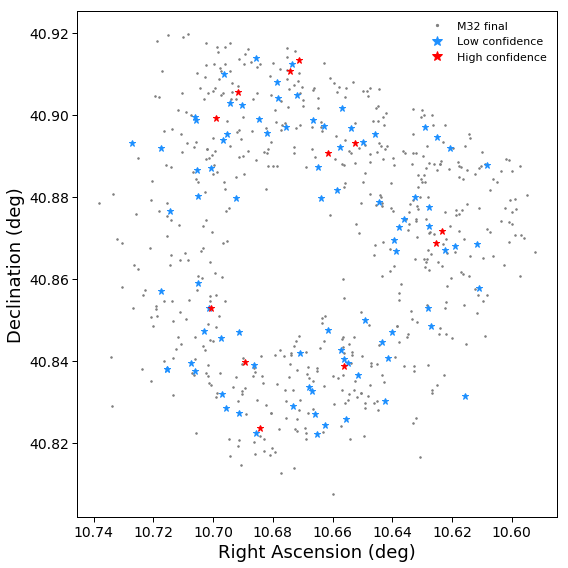

In [152]:
# Location plot of variables split by the histogram above

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.plot(final_M32_cat['RA'], final_M32_cat['Dec'], '.', color='grey', ms=3, label="M32 final")
plt.plot(variable_data['RA'][low_idx], variable_data['Dec'][low_idx], '*', color='dodgerblue', ms=7, label="Low confidence")
plt.plot(variable_data['RA'][high_idx], variable_data['Dec'][high_idx], '*', color='red', ms=7, label="High confidence")  

plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=1.5)
#plt.title('M32 epoch 1',fontsize=18)
plt.gca().invert_xaxis()    # flip the x-axis


#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

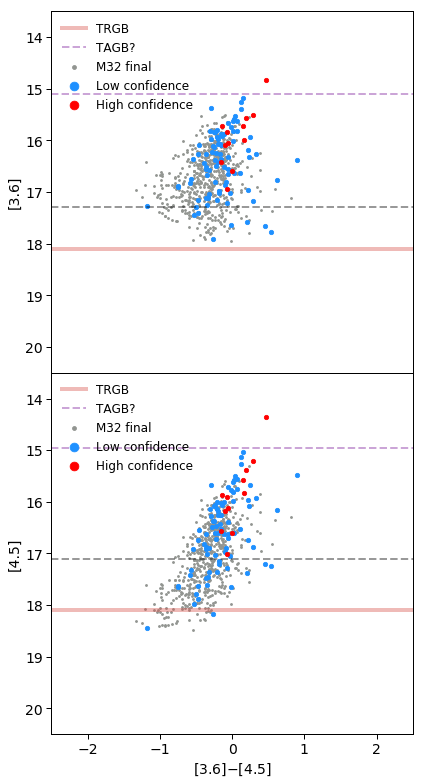

In [191]:
# Mean CMD with variables overplotted according to above histogram

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 final")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][low_idx]-variable_data['mean_mag_45'][low_idx], variable_data['mean_mag_36'][low_idx],s=19,color='dodgerblue',label="Low confidence")
plt.scatter(variable_data['mean_mag_36'][high_idx]-variable_data['mean_mag_45'][high_idx], variable_data['mean_mag_36'][high_idx],s=19,color='red',label="High confidence")
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.axhline(y=15.11, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB?')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 final")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][low_idx]-variable_data['mean_mag_45'][low_idx], variable_data['mean_mag_45'][low_idx],s=19,color='dodgerblue',label="Low confidence")
plt.scatter(variable_data['mean_mag_36'][high_idx]-variable_data['mean_mag_45'][high_idx], variable_data['mean_mag_45'][high_idx],s=19,color='red',label="High confidence")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.axhline(y=14.95, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB?')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

In [48]:
x=0.1 # value from paper
y=16.444 # absolute mag of -8, use mean distance modulus of M32 from A census of orbital properties of the M31 satellites
#Laura L. Watkins, N. Wyn Evans and Glenn van de Ven page 13

# Select using colour and 36 mag
print("Final M32 data")
var_1_idx=np.where((final_M32_cat['mag_36_1']-final_M32_cat['mag_45_1']>x)&(final_M32_cat['mag_36_1']<y)&
                  (final_M32_cat['mag_36_1']!=-99)&(final_M32_cat['mag_45_1']!=-99))
var_3_idx=np.where((final_M32_cat['mag_36_3']-final_M32_cat['mag_45_3']>x)&(final_M32_cat['mag_36_3']<y)&
                  (final_M32_cat['mag_36_3']!=-99)&(final_M32_cat['mag_45_3']!=-99))
var_4_idx=np.where((final_M32_cat['mag_36_4']-final_M32_cat['mag_45_4']>x)&(final_M32_cat['mag_36_4']<y)&
                  (final_M32_cat['mag_36_4']!=-99)&(final_M32_cat['mag_45_4']!=-99))

# Flag these sources as evolved in the relevant epoch
final_M32_cat['evolved_1'][var_1_idx]=1
final_M32_cat['evolved_3'][var_3_idx]=1
final_M32_cat['evolved_4'][var_4_idx]=1
print("No. evolved in E1: ",len(var_1_idx[0]))
print("No. evolved in E3: ",len(var_3_idx[0]))
print("No. evolved in E4: ",len(var_4_idx[0]))
final_M32_cat['evolved_times']=final_M32_cat['evolved_1']+final_M32_cat['evolved_3']+final_M32_cat['evolved_4']

print("\nVariable data")
var_1_idx=np.where((variable_data['mag_36_1']-variable_data['mag_45_1']>x)&(variable_data['mag_36_1']<y)&
                  (variable_data['mag_36_1']!=-99)&(variable_data['mag_45_1']!=-99))
var_3_idx=np.where((variable_data['mag_36_3']-variable_data['mag_45_3']>x)&(variable_data['mag_36_3']<y)&
                  (variable_data['mag_36_3']!=-99)&(variable_data['mag_45_3']!=-99))
var_4_idx=np.where((variable_data['mag_36_4']-variable_data['mag_45_4']>x)&(variable_data['mag_36_4']<y)&
                  (variable_data['mag_36_4']!=-99)&(variable_data['mag_45_4']!=-99))

# Flag these sources as evolved in the relevant epoch
variable_data['evolved_1'][var_1_idx]=1
variable_data['evolved_3'][var_3_idx]=1
variable_data['evolved_4'][var_4_idx]=1
print("No. evolved in E1: ",len(var_1_idx[0]))
print("No. evolved in E3: ",len(var_3_idx[0]))
print("No. evolved in E4: ",len(var_4_idx[0]))
variable_data['evolved_times']=variable_data['evolved_1']+variable_data['evolved_3']+variable_data['evolved_4']


#print(final_M32_cat.colnames)
#final_M32_cat[0:4].show_in_notebook()
#print(max(variable_data['evolved_4']))

Final M32 data
No. evolved in E1:  21
No. evolved in E3:  12
No. evolved in E4:  13

Variable data
No. evolved in E1:  12
No. evolved in E3:  10
No. evolved in E4:  12


Number of evolved sources:  28
Number of evolved sources as % of entire catalogue:  4.24886191198786
evolved in all 3 epochs:  5
For all evolved:
Dust production rate:  5.59e-10 M_sol/yr
Mass loss rate:  1.12e-07 M_sol/yr

For evolved variables:
Dust production rate:  6.63e-10 M_sol/yr
Mass loss rate:  1.33e-07 M_sol/yr

For high confidence evolved variables:
Dust production rate:  7.18e-10 M_sol/yr
Mass loss rate:  1.44e-07 M_sol/yr


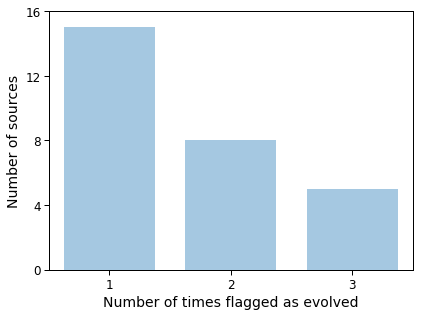

In [91]:
## Estimate dust budget for evoled stars
# Make sure you use the corrected data!!!!!

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(5) - 0.5 #add one for Python limit, one due to 0.5 shift
#bins = [1,2,3,4]
ax = sns.distplot(final_M32_cat['evolved_times'][np.where(final_M32_cat['evolved_times']>0)] ,kde=False, bins=bins,
                 hist_kws={"rwidth":0.75})
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_xlabel('Number of times flagged as evolved')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
ax.set_yticks(np.arange(0,19,4))
ax.set_xlim(0.5,3.5)
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Take mean colour of all sources that are evolved (currently any of those on histogram)
# Assume we use mean colour of the entire data set pertaining to a evolved source (not just epochs classes as evolved)
evolved_source_idx = np.where(final_M32_cat['evolved_times']>0)
final_M32_cat['Evolved']=0
final_M32_cat['Evolved'][evolved_source_idx]=1
print("Number of evolved sources: ",len(evolved_source_idx[0]))
print("Number of evolved sources as % of entire catalogue: ",100*len(evolved_source_idx[0])/len(final_M32_cat))
test_idx = np.where(final_M32_cat['evolved_times']==3)
print("evolved in all 3 epochs: ",len(test_idx[0]))

# First use all variables
print("For all evolved:")
mean_colour_array = final_M32_cat['mean_mag_36'][evolved_source_idx]-final_M32_cat['mean_mag_45'][evolved_source_idx]
mean_colour_variables = np.mean(mean_colour_array)
std_colour_variables = np.std(mean_colour_array)
D=np.power(10,-9.5+(1.4*mean_colour_variables))
D1=np.format_float_scientific(D,2)
print("Dust production rate: ",D1,"M_sol/yr")
print("Mass loss rate: ",np.format_float_scientific(200*D,2),"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables-std_colour_variables))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables+std_colour_variables))),2)
#print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

# Then try variables that are also evolved!
print("\nFor evolved variables:")
evolved_var_idx = np.where((variable_data['evolved_times']>0)&(variable_data['low_variable_times']>0))
mean_colour_array = variable_data['mean_mag_36'][evolved_var_idx]-variable_data['mean_mag_45'][evolved_var_idx]
mean_colour_variables = np.mean(mean_colour_array)
std_colour_variables = np.std(mean_colour_array)
D=np.power(10,-9.5+(1.4*mean_colour_variables))
D1=np.format_float_scientific(D,2)
print("Dust production rate: ",D1,"M_sol/yr")
print("Mass loss rate: ",np.format_float_scientific(200*D,2),"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables-std_colour_variables))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables+std_colour_variables))),2)
#print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

# Then try high confidence variables that are also evolved!
print("\nFor high confidence evolved variables:")
evolved_high_var_idx = np.where((variable_data['evolved_times']>0)&(variable_data['High_Confidence']==1))
mean_colour_array = variable_data['mean_mag_36'][evolved_high_var_idx]-variable_data['mean_mag_45'][evolved_high_var_idx]
mean_colour_variables = np.mean(mean_colour_array)
std_colour_variables = np.std(mean_colour_array)
D=np.power(10,-9.5+(1.4*mean_colour_variables))
D1=np.format_float_scientific(D,2)
print("Dust production rate: ",D1,"M_sol/yr")
print("Mass loss rate: ",np.format_float_scientific(200*D,2),"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables-std_colour_variables))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables+std_colour_variables))),2)
#print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

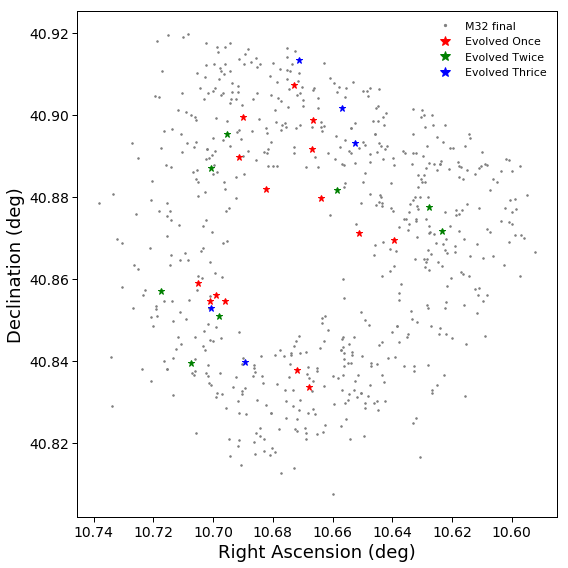

In [151]:
# Location plot of evolved (colour-selected) sources
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

Eonce_idx = np.where(final_M32_cat['evolved_times']==1)
Etwice_idx = np.where(final_M32_cat['evolved_times']==2)
Ethrice_idx = np.where(final_M32_cat['evolved_times']==3)

# Make the actual plot
plt.plot(final_M32_cat['RA'], final_M32_cat['Dec'], '.', color='grey', ms=3, label="M32 final")
plt.plot(final_M32_cat['RA'][Eonce_idx], final_M32_cat['Dec'][Eonce_idx], '*', color='red', ms=7, label="Evolved Once")
plt.plot(final_M32_cat['RA'][Etwice_idx], final_M32_cat['Dec'][Etwice_idx], '*', color='green', ms=7, label="Evolved Twice")  
plt.plot(final_M32_cat['RA'][Ethrice_idx], final_M32_cat['Dec'][Ethrice_idx], '*', color='blue', ms=7, label="Evolved Thrice")     
plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=1.5)
#plt.title('M32 epoch 1',fontsize=18)
plt.gca().invert_xaxis()    # flip the x-axis


#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

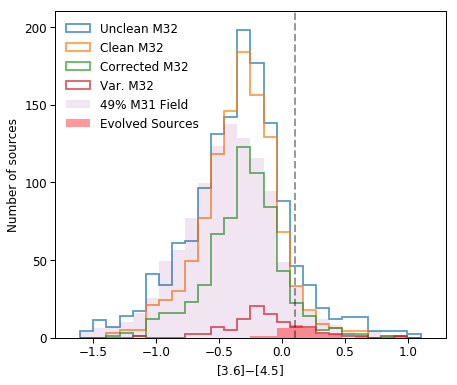

In [93]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
fig = plt.figure(figsize=(7, 6))
ax1 = plt.gca()  # Sets up active plot region

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36']-clean_data['mean_mag_45'])  # Determinal optimal bin size
bins = np.linspace(-1.6, 1.1, 27)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(unclean_data['mean_mag_36']-unclean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.8, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")
n, edg, patches = ax1.hist(clean_data['mean_mag_36']-clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.8, alpha=1.75, histtype='step', label="Clean M32", ls="solid")
n, edg, patches = ax1.hist(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.8, alpha=1.75, histtype='step', label="Corrected M32", ls="solid")
n, edg, patches = ax1.hist(variable_data['mean_mag_36']-variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.8, alpha=1.75, histtype='step', label="Var. M32", ls="solid")

rangex = bins+(1.1+1.6)/(26*2)

n, edg, patches = ax1.hist(bgd_data['mag_36_0']-bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.8, alpha=0.0, histtype='step', label=None, ls="solid")
plt.bar(x=rangex[0:len(rangex)-1],height=scale_M31_M32*n,align='center',linewidth=0,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(1.1+1.6)/26,alpha=0.1,label='49% M31 Field')

#evolved_final_idx = np.where(final_M32_cat['evolved_times']>1)
n, edg, patches = ax1.hist(final_M32_cat['mean_mag_36'][evolved_source_idx]-final_M32_cat['mean_mag_45'][evolved_source_idx],
                           bins,  # facecolor='g', edgecolor='b',
                          lw=1.8, alpha=0.0, histtype='step', label=None, ls="solid")
plt.bar(x=rangex[0:len(rangex)-1],height=n,align='center',linewidth=0,edgecolor=(1.0,1.0,1.0,0.0),
       color='red',width=(1.1+1.6)/26,alpha=0.4,label='Evolved Sources')



ax1.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax1.set_ylabel("Number of sources", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Set legend
ax1.legend(loc='upper left', frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
ax1.set_xlim(-1.8,1.3)
ax1.set_ylim(0,210)
ax1.set_yticks(np.arange(0,210,50))
plt.show()
plt.close()


In [94]:
# Set evolved star region

x=0.1 # value from paper
y=16.444 # absolute mag of -8, use mean distance modulus of M32 from A census of orbital properties of the M31 satellites
#Laura L. Watkins, N. Wyn Evans and Glenn van de Ven page 13

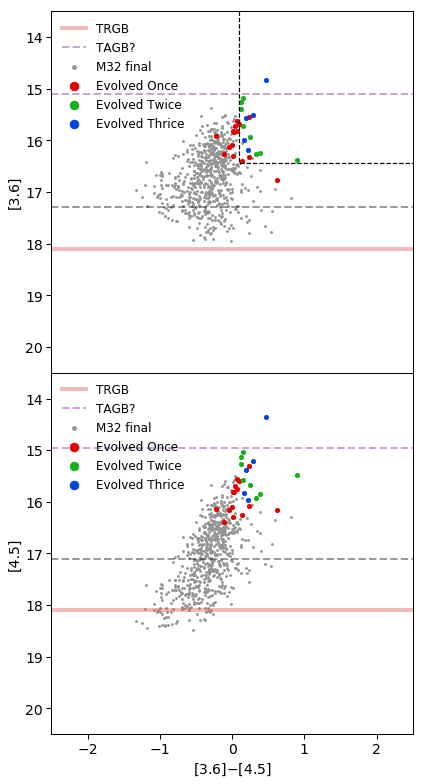

In [193]:
# Mean CMD with evolved sources overplotted according to above histogram

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

xlim = [-2.5,2.5]
ylim = [20.5,13.5]

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 final")
# Overplot Evolved sources
plt.scatter(final_M32_cat['mean_mag_36'][Eonce_idx]-final_M32_cat['mean_mag_45'][Eonce_idx], final_M32_cat['mean_mag_36'][Eonce_idx],s=19,color=sns.xkcd_rgb['red'],label="Evolved Once")
plt.scatter(final_M32_cat['mean_mag_36'][Etwice_idx]-final_M32_cat['mean_mag_45'][Etwice_idx], final_M32_cat['mean_mag_36'][Etwice_idx],s=19,color=sns.xkcd_rgb['green'],label="Evolved Twice")
plt.scatter(final_M32_cat['mean_mag_36'][Ethrice_idx]-final_M32_cat['mean_mag_45'][Ethrice_idx], final_M32_cat['mean_mag_36'][Ethrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Evolved Thrice")
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(xlim)
plt.ylim(ylim)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.axhline(y=15.11, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB?')


# Plot evolved box on 3.6 CMD
# NB: some sources will fall outside the box because this is a mean CMD (but blue sources should ALL be in box)
plt.plot([x,x,xlim[1]],[ylim[1],y,y],linestyle='dashed',color='black')

plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(final_M32_cat['mean_mag_36']-final_M32_cat['mean_mag_45'], final_M32_cat['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 final")
# Overplot Evolved sources
plt.scatter(final_M32_cat['mean_mag_36'][Eonce_idx]-final_M32_cat['mean_mag_45'][Eonce_idx], final_M32_cat['mean_mag_45'][Eonce_idx],s=19,color=sns.xkcd_rgb['red'],label="Evolved Once")
plt.scatter(final_M32_cat['mean_mag_36'][Etwice_idx]-final_M32_cat['mean_mag_45'][Etwice_idx], final_M32_cat['mean_mag_45'][Etwice_idx],s=19,color=sns.xkcd_rgb['green'],label="Evolved Twice")
plt.scatter(final_M32_cat['mean_mag_36'][Ethrice_idx]-final_M32_cat['mean_mag_45'][Ethrice_idx], final_M32_cat['mean_mag_45'][Ethrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Evolved Thrice")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(xlim)
plt.ylim(ylim)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.axhline(y=14.95, color=sns.xkcd_rgb["purple"], linestyle='--', alpha=0.4, linewidth=2,label='TAGB?')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

43
27
64


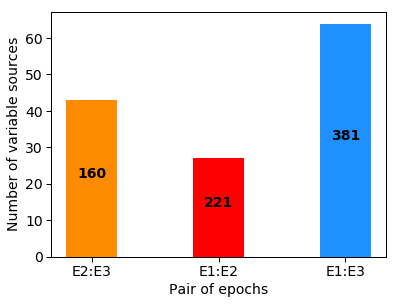

In [158]:
# Histogram of variables in each epoch pair
# NB: can check these numbers from _clean.ipynb when variables were assigned
var_num_3_4 = len((np.where(final_M32_cat['low_variable_3_4']==1))[0])
print(var_num_3_4)
var_num_1_3 = len((np.where(final_M32_cat['low_variable_1_3']==1))[0])
print(var_num_1_3)
var_num_1_4 = len((np.where(final_M32_cat['low_variable_1_4']==1))[0])
print(var_num_1_4)
number_spread = np.array([var_num_3_4,var_num_1_3,var_num_1_4])

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
ig = plt.figure(figsize=(6,4.5))

bars = ('E2:E3', 'E1:E2', 'E1:E3')
# Choose the position of each barplot on the x-axis
y_pos = [1,3,5]
# Create bars
plt.bar(y_pos, number_spread,color=['darkorange','red','dodgerblue'])
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel("Pair of epochs")
plt.ylabel("Number of variable sources")

# Add baselines to the bars
plt.annotate("160", [1, number_spread[0]/2], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("221", [3, number_spread[1]/2], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("381", [5, number_spread[2]/2], horizontalalignment='center', size=14, color='black',weight='bold')

 
# Show graphic
plt.show()

In [97]:
# Flag evolved sources in variable catalogue

evolved_var_idx = np.where(variable_data['evolved_times']>0)
variable_data['Evolved']=0
variable_data['Evolved'][evolved_var_idx]=1

print(len(evolved_var_idx[0]))

print(variable_data.colnames)

17
['ID', 'RA', 'Dec', 'total_associations', 'ID_36_1', 'RA_36_1', 'Dec_36_1', 'mag_36_1', 'mag_err_36_1', 'ID_36_3', 'RA_36_3', 'Dec_36_3', 'mag_36_3', 'mag_err_36_3', 'sep_36_1_3', 'p_any_36_1_3', 'p_i_36_1_3', 'ID_36_4', 'RA_36_4', 'Dec_36_4', 'mag_36_4', 'mag_err_36_4', 'sep_36_1&3_4', 'p_any_36_1&3_4', 'p_i_36_1&3_4', '36_associations', 'ID_45_1', 'RA_45_1', 'Dec_45_1', 'mag_45_1', 'mag_err_45_1', 'ID_45_3', 'RA_45_3', 'Dec_45_3', 'mag_45_3', 'mag_err_45_3', 'sep_45_1_3', 'p_any_45_1_3', 'p_i_45_1_3', 'ID_45_4', 'RA_45_4', 'Dec_45_4', 'mag_45_4', 'mag_err_45_4', 'sep_45_1&3_4', 'p_any_45_1&3_4', 'p_i_45_1&3_4', '45_associations', 'sep_mean_36_mean_45', 'p_any_36_45', 'p_i_36_45', 'mean_RA_36', 'mean_Dec_36', 'mean_RA_45', 'mean_Dec_45', 'good_source?', 'flux_36_1', 'flux_36_3', 'flux_36_4', 'flux_45_1', 'flux_45_3', 'flux_45_4', 'flux_err_36_1', 'flux_err_36_3', 'flux_err_36_4', 'flux_err_45_1', 'flux_err_45_3', 'flux_err_45_4', 'var_36_1_3', 'var_36_1_3_abs', 'var_36_1_4', 'var_3

# Write variable data to file

In [101]:
# Write out full variable file
ascii.write(variable_data,'final_variables_opt.csv',format='csv',overwrite=True)
print("Variables:",len(variable_data))

# Write out variable file for VizieR
ascii.write(variable_data['RA','Dec'],'final_variables_opt_RA_Dec.csv',format='csv',overwrite=True)

Variables: 96


In [130]:
# Write out full final_M32_cat file
ascii.write(final_M32_cat,'final_M32_opt.csv',format='csv',overwrite=True)
print("Final M32 sources:",len(final_M32_cat))

# Write out variable file for VizieR
ascii.write(final_M32_cat['RA','Dec'],'final_M32_opt_RA_Dec.csv',format='csv',overwrite=True)

Final M32 sources: 659


In [132]:
# Write out full final_M32_cat file containing only evolved sources
final_M32_evolved_cat = final_M32_cat[evolved_source_idx]
ascii.write(final_M32_evolved_cat,'final_M32_evolved_opt.csv',format='csv',overwrite=True)
print("Final evolved M32 sources:",len(final_M32_evolved_cat))

# Write out variable file for VizieR
ascii.write(final_M32_evolved_cat['RA','Dec'],'final_M32_evolved_opt_RA_Dec.csv',format='csv',overwrite=True)

Final evolved M32 sources: 28


In [128]:
Jones_file = 'Jones_var_matched.csv'
Jones_data = ascii.read(Jones_file, delimiter=',')

In [129]:
#print(Jones_data[0:3])
print(Jones_data.colnames)
idx_36_80 = np.where((Jones_data['m36']!=-99.0)&(Jones_data['m80']!=-99.0))
print(len(idx_36_80[0]))
data_36_80 = Jones_data[idx_36_80]
#data_36_80.show_in_notebook()

mean_colour_array = Jones_data['m36'][idx_36_80]-Jones_data['m80'][idx_36_80]
mean_colour_variables = np.mean(mean_colour_array)
std_colour_variables = np.std(mean_colour_array)
D=np.power(10,-3.39-6.2/(0.83+mean_colour_variables))
D1=np.format_float_scientific(D,2)
print("Dust production rate: ",D1,"M_sol/yr")
print("Mass loss rate: ",np.format_float_scientific(200*D,2),"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables-std_colour_variables))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables+std_colour_variables))),2)
#print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

['Jones#', 'Name', 'RA', 'Dec', 'm36', 'e36', 'm45', 'e45', 'm58', 'e58', 'm80', 'e80']
16
Dust production rate:  6.96e-07 M_sol/yr
Mass loss rate:  1.39e-04 M_sol/yr


In [137]:
print(unclean_data.colnames)

['ID', 'RA', 'Dec', 'total_associations', 'ID_36_1', 'RA_36_1', 'Dec_36_1', 'mag_36_1', 'mag_err_36_1', 'ID_36_3', 'RA_36_3', 'Dec_36_3', 'mag_36_3', 'mag_err_36_3', 'sep_36_1_3', 'p_any_36_1_3', 'p_i_36_1_3', 'ID_36_4', 'RA_36_4', 'Dec_36_4', 'mag_36_4', 'mag_err_36_4', 'sep_36_1&3_4', 'p_any_36_1&3_4', 'p_i_36_1&3_4', '36_associations', 'ID_45_1', 'RA_45_1', 'Dec_45_1', 'mag_45_1', 'mag_err_45_1', 'ID_45_3', 'RA_45_3', 'Dec_45_3', 'mag_45_3', 'mag_err_45_3', 'sep_45_1_3', 'p_any_45_1_3', 'p_i_45_1_3', 'ID_45_4', 'RA_45_4', 'Dec_45_4', 'mag_45_4', 'mag_err_45_4', 'sep_45_1&3_4', 'p_any_45_1&3_4', 'p_i_45_1&3_4', '45_associations', 'sep_mean_36_mean_45', 'p_any_36_45', 'p_i_36_45', 'flux_36_1', 'flux_36_3', 'flux_36_4', 'flux_45_1', 'flux_45_3', 'flux_45_4', 'flux_err_36_1', 'flux_err_36_3', 'flux_err_36_4', 'flux_err_45_1', 'flux_err_45_3', 'flux_err_45_4', 'var_36_1_3', 'var_36_1_3_sign', 'var_36_1_4', 'var_36_1_4_sign', 'var_36_3_4', 'var_36_3_4_sign', 'var_45_1_3', 'var_45_1_3_sign

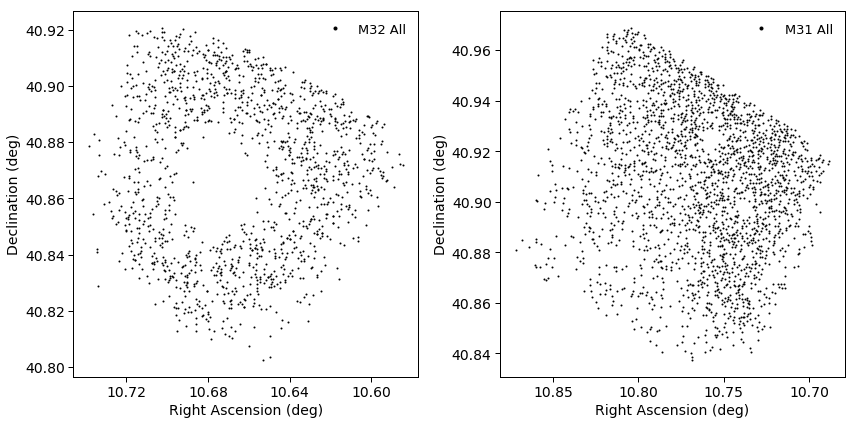

In [150]:
# Location plot for unclean and M31 data
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=13)
plt.figure(figsize=(12,6))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.subplot(1,2,1)
plt.gca().invert_xaxis()    # flip the x-axis

plt.plot(unclean_data['RA'], unclean_data['Dec'], '.', color='black', ms=2, label="M32 All")
plt.xlabel('Right Ascension (deg)')
plt.xticks(np.arange(10.6,10.74,0.04))
plt.ylabel('Declination (deg)')
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 epoch 1',fontsize=18)

plt.subplot(1,2,2)
plt.gca().invert_xaxis()    # flip the x-axis

plt.plot(bgd_data['RA'], bgd_data['DEC'], '.', color='black', ms=2, label="M31 All")
plt.xlabel('Right Ascension (deg)')
#plt.xticks(np.arange(10.6,10.74,0.04))
plt.ylabel('Declination (deg)')
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 epoch 2',fontsize=18)
#
plt.tight_layout()
#plt.subplots_adjust(hspace=5)
plt.savefig("fixing/Unclean_and_M31_loc_plots.pdf", bbox_inches='tight')
plt.show()
plt.close()


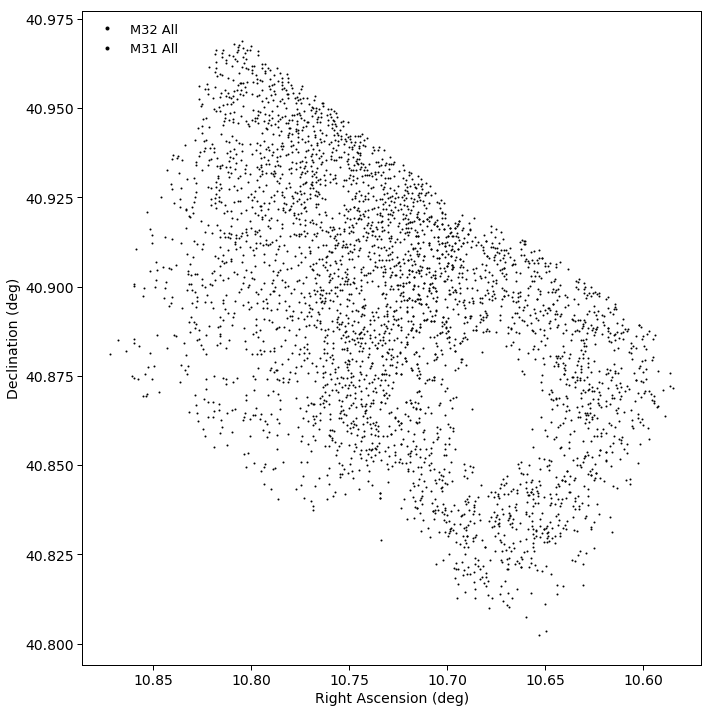

In [147]:
# Location plot for unclean and M31 data
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=13)
plt.figure(figsize=(10,10))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.plot(unclean_data['RA'], unclean_data['Dec'], '.', color='black', ms=2, label="M32 All")
plt.plot(bgd_data['RA'], bgd_data['DEC'], '.', color='black', ms=2, label="M31 All")
plt.xlabel('Right Ascension (deg)')
#plt.xticks(np.arange(10.6,10.74,0.04))
plt.ylabel('Declination (deg)')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 epoch 1',fontsize=18)

#
plt.tight_layout()
plt.gca().invert_xaxis()    # flip the x-axis

#plt.subplots_adjust(hspace=5)
#plt.savefig("fixing/Unclean_and_M31_loc_plots.pdf", bbox_inches='tight')
plt.show()
plt.close()
